<a href="https://colab.research.google.com/github/luckysiabula-bit/classification_of_domain-subject_area_reference./blob/main/classification_of_domain_subject_area_reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding
### 1.1 Problem Statement

The rapid growth of digital content in education, research, and industry has made it increasingly difficult to organize and retrieve information effectively. Manual classification of documents into subject areas or domains is slow, costly, and prone to inconsistency due to human error. This creates barriers to efficient knowledge management and slows down research or learning processes.

An automated classification system for domain/subject area reference will allow organizations to process large volumes of documents quickly, assign them to appropriate categories, and improve accessibility for end-users.


### 1.2 Business Objectives

The main business objective is to develop an automated classification system that assigns documents to predefined subject areas with high accuracy and efficiency.

From a real-world perspective, success means:
- Reducing manual classification workload by at least 70%.
- Achieving a minimum classification accuracy of 80%.
- Improving document retrieval time in repositories and databases.
- Increasing user satisfaction by making content easier to find and navigate.

### 1.3 Data Mining Goals

To achieve the stated business objectives, the project will:
- Build a supervised classification model capable of predicting the correct subject area from textual input.
- Use Natural Language Processing (NLP) techniques such as TF-IDF vectorization and word embeddings to extract meaningful features from text.
- Test multiple algorithms including Logistic Regression, Random Forest, Support Vector Machines, and transformer-based models like BERT.
- Select the model that provides the best trade-off between accuracy, speed, and interpretability.

### 1.4 Initial Project Success Criteria

The project will be considered successful if:
- The model achieves at least 80% accuracy on the test dataset.
- Precision and recall for each subject area are above 0.75.
- The system processes at least 500 documents per minute without significant performance loss.
- Classifications match expert-labeled results in at least 8 out of 10 randomly reviewed cases

### 1.5 Section Integration

This section integrates all parts of the Business Understanding phase into a single, well-structured document. The text is organized into four main subsections: Problem Statement, Business Objectives, Data Mining Goals, and Initial Project Success Criteria. The same content is reflected in both the Google Colab notebook and the README.md file to ensure consistency between development and documentation. Formatting, headings, and numbering follow a clear and professional style for ease of reading.

##2. Data Understanding

This section loads the raw dataset, performs first-look exploration, and visualizes key distributions to identify data quality issues and class balance.



## 2.1 Load the Dataset

We loaded the dataset into a Pandas DataFrame. The dataset contains BBC News articles with three columns:

- **ArticleId** – a unique identifier for each document  
- **Text** – the full article text  
- **Category** – the subject area label (target variable)


In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Mount Google Drive
drive.mount('/content/drive')

# Path to your file in Google Drive
file_path = '/content/drive/MyDrive/BBC News Train.csv'

# Load dataset
df = pd.read_csv(file_path)

# Display info about dataset
print(df.head())      # () needed to call the method

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business


## 2.2 Dataset Structure  

The dataset contains **1,490 rows** and **3 columns**.  

**Columns:**  
- `ArticleId` *(integer, unique ID)*  
- `Text` *(string, main content)*  
- `Category` *(string, label for classification)*  

No missing values were found in any of the columns.  


In [ ]:
from google.colab import drive
import pandas as pd


# Mount Google Drive
drive.mount('/content/drive')

# Path to your file in Google Drive
file_path = '/content/drive/MyDrive/BBC News Train.csv'

# Load dataset
df = pd.read_csv(file_path)
df.shape
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


## 2.3 Initial Exploration of Attributes  

In [ ]:
from google.colab import drive
import pandas as pd
# Mount Google Drive
drive.mount('/content/drive')

# Path to your file in Google Drive
file_path = '/content/drive/MyDrive/BBC News Train.csv'

# Load dataset
df = pd.read_csv(file_path)

# Check missing values
df.isnull().sum()

# Distribution of categories
df["Category"].value_counts()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,count
Category,
sport,346
business,336
politics,274
entertainment,273
tech,261




**Category distribution:**  

- **sport:** 346  
- **business:** 336  
- **politics:** 274  
- **entertainment:** 273  
- **tech:** 261  

This shows that the dataset is relatively balanced, though *sport* and *business* have slightly more examples.  


## 2.4 Visual Exploration

The category bar chart confirms a fairly even spread across the five classes.

**Article lengths vary widely:**

- Minimum: 90 words  
- Maximum: 3,345 words  
- Mean: ~385 words  

Most articles fall between 250 and 470 words, but some long outliers exist.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


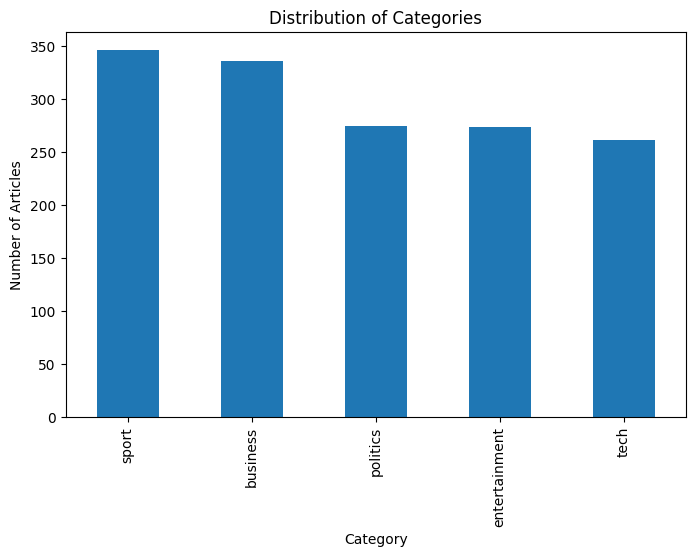

In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file in Google Drive
file_path = '/content/drive/MyDrive/BBC News Train.csv'

# Load dataset
df = pd.read_csv(file_path)

# Category distribution
df["Category"].value_counts().plot(kind="bar", figsize=(8,5))
plt.title("Distribution of Categories")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.show()

## 2.5 Initial Findings

From the exploration:

- The dataset is clean (**no missing values, consistent column types**).
- The target variable (**Category**) is well balanced across five subject areas, which is ideal for training a classification model.
- Article lengths are sufficient for NLP techniques like TF-IDF and embeddings, though long outliers may need truncation or handling.
- **ArticleId** is only an identifier and won’t be used for classification.
- No categorical or numerical features other than the text and label exist, so the project will focus primarily on **NLP feature engineering**.


# 3. Data Preparation

In this section, we prepare the dataset for the modeling phase.  
We will perform the following steps:

1. *Data Cleaning*  
   - Handle missing values  
   - Standardize text format (lowercasing, punctuation removal, stopword removal)  

2. *Feature Engineering*  
   - Create new features like text length, average word length, etc.  

3. *Data Transformation*  
   - Encode categorical labels into numerical values  
   - Convert text data into numerical features using TF-IDF Vectorization

## 3.1 Setup and Data Loading

In this step, we import the necessary libraries and load the BBC News dataset.  
We also display the first few rows to understand the structure of the data.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import string

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file in Google Drive
file_path = '/content/drive/MyDrive/BBC News Train.csv'

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords


# Load dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()
#Define the list of columns we believe are most relevant for our initial model
var_relevant_columns = ['Text','Category']

#Select only these columns from the working DataFrame
var_selected_df = df[var_relevant_columns]
print("--- Data Selection Complete ---")
print(f"Original number of columns: {len(df.columns)}")
print(f"Number of columns after selection: {len(var_selected_df.columns)}")
var_selected_df.head(2).T



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


--- Data Selection Complete ---
Original number of columns: 3
Number of columns after selection: 2


,0,1
Text,worldcom ex-boss launches defence lawyers defe...,german business confidence slides german busin...
Category,business,business


## 3.2 Data Cleaning

We handle missing values and clean the text:

- Drop rows with missing values in `Text` or `Category`  
- Convert text to lowercase  
- Remove punctuation and numbers  
- Remove stopwords to reduce noise


In [ ]:
# Import required libraries
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file in Google Drive
file_path = '/content/drive/MyDrive/BBC News Train.csv'


# Load dataset
df = pd.read_csv(file_path)

# Select only the relevant columns from df
var_relevant_columns = df[["Text", "Category"]]

# Check missing values
print("Missing values:\n", var_relevant_columns.isnull().sum())

# Drop rows with missing text/category
var_relevant_columns = var_relevant_columns.dropna(subset=["Text", "Category"])

# Define stopwords
stop_words = set(stopwords.words("english"))

# Text cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    text = re.sub(r"\d+", "", text)  # remove numbers
    tokens = [word for word in text.split() if word not in stop_words]  # remove stopwords
    return " ".join(tokens)

# Apply cleaning
var_relevant_columns["Clean_Text"] = var_relevant_columns["Text"].apply(clean_text)

var_relevant_columns[["Text", "Clean_Text"]].head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Missing values:
 Text        0
Category    0
dtype: int64


,Text,Clean_Text
0,worldcom ex-boss launches defence lawyers defe...,worldcom exboss launches defence lawyers defen...
1,german business confidence slides german busin...,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens maj...
3,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,enron bosses payout eighteen former enron dire...


## 3.3 Feature Engineering

We add new features that may provide useful signals for classification:

- **text_length**: number of words in the cleaned text  
- **avg_word_length**: average word length


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import string

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file in Google Drive
file_path = '/content/drive/MyDrive/BBC News Train.csv'

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords


# Load dataset
df = pd.read_csv(file_path)

# Select only the relevant columns from df
var_relevant_columns = df[["Text", "Category"]]

# Check missing values
print("Missing values:\n", var_relevant_columns.isnull().sum())

# Drop rows with missing text/category
var_relevant_columns = var_relevant_columns.dropna(subset=["Text", "Category"])

# Define stopwords
stop_words = set(stopwords.words("english"))

# Text cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    text = re.sub(r"\d+", "", text)  # remove numbers
    tokens = [word for word in text.split() if word not in stop_words]  # remove stopwords
    return " ".join(tokens)

# Apply cleaning
var_relevant_columns["Clean_Text"] = var_relevant_columns["Text"].apply(clean_text)

# Feature: text length (word count)
var_relevant_columns["text_length"] = var_relevant_columns["Clean_Text"].apply(lambda x: len(x.split()))

# Feature: average word length
var_relevant_columns["avg_word_length"] = var_relevant_columns["Clean_Text"].apply(
    lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0
)

var_relevant_columns[["Clean_Text", "text_length", "avg_word_length"]].head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Missing values:
 Text        0
Category    0
dtype: int64


,Clean_Text,text_length,avg_word_length
0,worldcom exboss launches defence lawyers defen...,185,6.513514
1,german business confidence slides german busin...,194,6.603093
2,bbc poll indicates economic gloom citizens maj...,267,6.722846
3,lifestyle governs mobile choice faster better ...,344,5.924419
4,enron bosses payout eighteen former enron dire...,200,6.620000


## 3.4 Label Encoding

We encode the categorical target column (`Category`) into numerical values.  
This allows machine learning algorithms to work with the labels.


In [ ]:
# Import required libraries
import pandas as pd

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file in Google Drive
file_path = '/content/drive/MyDrive/BBC News Train.csv'

from sklearn.preprocessing import LabelEncoder


# Load dataset
df = pd.read_csv(file_path)

# Select only the relevant columns from df
var_relevant_columns = df[["Text", "Category"]]

# Check missing values
print("Missing values:\n", var_relevant_columns.isnull().sum())

# Drop rows with missing text/category
var_relevant_columns = var_relevant_columns.dropna(subset=["Text", "Category"])

# Define stopwords
stop_words = set(stopwords.words("english"))

# Text cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    text = re.sub(r"\d+", "", text)  # remove numbers
    tokens = [word for word in text.split() if word not in stop_words]  # remove stopwords
    return " ".join(tokens)

# Apply cleaning
var_relevant_columns["Clean_Text"] = var_relevant_columns["Text"].apply(clean_text)

# Encode labels
label_encoder = LabelEncoder()
var_relevant_columns["Category_Label"] = label_encoder.fit_transform(var_relevant_columns["Category"])

# Show label mapping
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

var_relevant_columns[["Category", "Category_Label"]].head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Missing values:
 Text        0
Category    0
dtype: int64
Label Mapping: {'business': np.int64(0), 'entertainment': np.int64(1), 'politics': np.int64(2), 'sport': np.int64(3), 'tech': np.int64(4)}


,Category,Category_Label
0,business,0
1,business,0
2,business,0
3,tech,4
4,business,0


**Section 4**

4. Modeling

This section covers:
- Train/test split


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

# Load data
df = pd.read_csv('/content/drive/MyDrive/BBC News Train.csv')
# Drop irrelevant columns
df = df.drop(columns=['ArticleId'])
# Ensure text is string and label is string
df['Text'] = df['Text'].astype(str)
df['Category'] = df['Category'].astype(str)
# Split into train/test (80/20) stratified to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
 df['Text'], df['Category'], test_size=0.2, random_state=42,
stratify=df['Category']
)
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Mounted at /content/drive
Train size: 1192, Test size: 298


In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report

from google.colab import drive
drive.mount('/content/drive')

# 1. Load dataset
df = pd.read_csv("/content/drive/MyDrive/BBC News Train.csv")

print(df.columns)

# 2. Define features (X) and labels (y)
X = df['Text']        # feature: news article text
y = df['Category']    # label: news category

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Pipeline: TF-IDF + Naive Bayes
pipe_nb = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2),
                              max_df=0.9, min_df=2)),
    ('clf', MultinomialNB())
])

# 5. Hyperparameters
param_nb = {'clf__alpha': [0.1, 0.5, 1.0]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 6. Grid search
gs_nb = GridSearchCV(pipe_nb, param_grid=param_nb, scoring='f1_macro',
                     cv=cv, n_jobs=-1, verbose=1)
gs_nb.fit(X_train, y_train)

# 7. Predict & evaluate
y_pred_nb = gs_nb.predict(X_test)

print("NB Best Params:", gs_nb.best_params_)
print("NB Accuracy:", accuracy_score(y_test, y_pred_nb))
print("NB Macro F1:", f1_score(y_test, y_pred_nb, average='macro'))
print(classification_report(y_test, y_pred_nb))


Mounted at /content/drive
Index(['ArticleId', 'Text', 'Category'], dtype='object')
Fitting 5 folds for each of 3 candidates, totalling 15 fits
NB Best Params: {'clf__alpha': 0.1}
NB Accuracy: 0.9832214765100671
NB Macro F1: 0.9823586607072846
               precision    recall  f1-score   support

     business       0.97      0.99      0.98        67
entertainment       1.00      1.00      1.00        55
     politics       0.98      0.96      0.97        55
        sport       1.00      1.00      1.00        69
         tech       0.96      0.96      0.96        52

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



In [ ]:
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2),
max_df=0.9, min_df=2)),
('clf', LogisticRegression(max_iter=2000, n_jobs=-1))
])

param_lr = {'clf__C': [0.5, 1.0, 2.0], 'clf__solver': ['liblinear', 'lbfgs']}

gs_lr = GridSearchCV(pipe_lr, param_grid=param_lr, scoring='f1_macro', cv=cv,
n_jobs=-1, verbose=1)
gs_lr.fit(X_train, y_train)

y_pred_lr = gs_lr.predict(X_test)

print("LR Best Params:", gs_lr.best_params_)
print("LR Accuracy:", accuracy_score(y_test, y_pred_lr))
print("LR Macro F1:", f1_score(y_test, y_pred_lr, average='macro'))
print(classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
LR Best Params: {'clf__C': 2.0, 'clf__solver': 'lbfgs'}
LR Accuracy: 0.9731543624161074
LR Macro F1: 0.9715422797242141
               precision    recall  f1-score   support

     business       0.96      0.99      0.97        67
entertainment       0.96      1.00      0.98        55
     politics       1.00      0.96      0.98        55
        sport       0.99      1.00      0.99        69
         tech       0.96      0.90      0.93        52

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
                 Model  Accuracy  Macro_F1
0          Naive Bayes  0.983221  0.982359
2           Linear SVM  0.979866  0.978999
1  Logistic Regression  0.973154  0.971542
Best model is: Naive Bayes


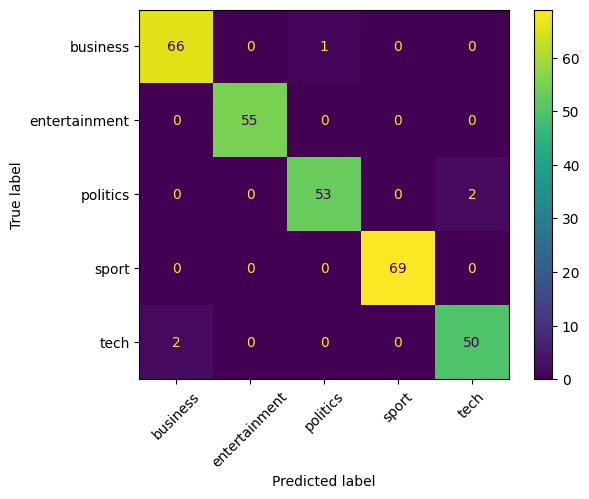

Saved model: models/Naive_Bayes.joblib


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, classification_report
import joblib
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline


# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/BBC News Train.csv")

# Define features (X) and labels (y)
X = df['Text']        # feature: news article text
y = df['Category']    # label: news category

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: TF-IDF + Naive Bayes
pipe_nb = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2),
                              max_df=0.9, min_df=2)),
    ('clf', MultinomialNB())
])

# Hyperparameters
param_nb = {'clf__alpha': [0.1, 0.5, 1.0]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search
gs_nb = GridSearchCV(pipe_nb, param_grid=param_nb, scoring='f1_macro',
                     cv=cv, n_jobs=-1, verbose=1)
gs_nb.fit(X_train, y_train)

# Pipeline: TF-IDF + Logistic Regression
pipe_lr = Pipeline([
('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2),
max_df=0.9, min_df=2)),
('clf', LogisticRegression(max_iter=2000, n_jobs=-1))
])

param_lr = {'clf__C': [0.5, 1.0, 2.0], 'clf__solver': ['liblinear', 'lbfgs']}

gs_lr = GridSearchCV(pipe_lr, param_grid=param_lr, scoring='f1_macro', cv=cv,
n_jobs=-1, verbose=1)
gs_lr.fit(X_train, y_train)

# Pipeline: TF-IDF + Linear SVM
pipe_svm = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2),
                              max_df=0.9, min_df=2)),
    ('clf', LinearSVC())
])

param_svm = {'clf__C': [0.5, 1.0, 2.0]}

gs_svm = GridSearchCV(pipe_svm, param_grid=param_svm, scoring='f1_macro',
                     cv=cv, n_jobs=-1, verbose=1)
gs_svm.fit(X_train, y_train)

# Collect results
results = []
def collect(name, y_true, y_pred):
  results.append({
"Model": name,
"Accuracy": accuracy_score(y_true, y_pred),
"Macro_F1": f1_score(y_true, y_pred, average='macro')
})
collect("Naive Bayes", y_test, gs_nb.predict(X_test))
collect("Logistic Regression", y_test, gs_lr.predict(X_test))
collect("Linear SVM", y_test, gs_svm.predict(X_test))
results_df = pd.DataFrame(results).sort_values("Macro_F1", ascending=False)
print(results_df)
# Select best model
best_model_name = results_df.iloc[0]['Model']
best_est = {"Naive Bayes": gs_nb, "Logistic Regression": gs_lr, "Linear SVM":
gs_svm}[best_model_name]
print("Best model is:", best_model_name)
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_est, X_test, y_test,
xticks_rotation=45)
plt.show()
# Save model
models_dir = Path("models")
models_dir.mkdir(exist_ok=True)
joblib.dump(best_est, models_dir / f"{best_model_name.replace(' ','_')}.joblib")
print("Saved model:", models_dir / f"{best_model_name.replace(' ','_')}.joblib")

In [7]:
import joblib
from pathlib import Path

# Define the path to the saved model
models_dir = Path("models")
model_path = models_dir / "Naive_Bayes.joblib"

# Load the model
loaded_model = joblib.load(model_path)

print(f"Model loaded successfully from: {model_path}")

Model loaded successfully from: models/Naive_Bayes.joblib


Evaluation Process

In [8]:
# Member 1: Predictions & Core Metrics
# Run this cell standalone. It will recreate X_test/y_test if not found and try to load a model.

import os
from pathlib import Path
import joblib
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

# -------------------------
# 1) Load data (try common paths)
# -------------------------
def load_df():
    candidates = [
        '/content/drive/MyDrive/BBC News Train (1).csv',
        '/content/drive/MyDrive/BBC News Train.csv',
        'BBC News Train (1).csv',
        'BBC News Train.csv'
    ]
    for p in candidates:
        if Path(p).exists():
            return pd.read_csv(p)
    raise FileNotFoundError("Dataset not found in default paths. Upload CSV or adjust path.")

# If df is defined earlier (in notebook), reuse it
try:
    df
except NameError:
    df = load_df()

# Drop ArticleId if present
if 'ArticleId' in df.columns:
    df = df.drop(columns=['ArticleId'])

# Ensure types
df['Text'] = df['Text'].astype(str)
df['Category'] = df['Category'].astype(str)

# -------------------------
# 2) Ensure train/test split exists
# -------------------------
if 'X_test' not in globals() or 'y_test' not in globals():
    X = df['Text'].values
    y = df['Category'].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"Created new split -> Train: {len(X_train)} | Test: {len(X_test)}")
else:
    print("Using existing X_test/y_test from notebook.")

# -------------------------
# 3) Load model (in-memory first, else joblib)
# -------------------------
def get_model_preference():
    # Try common variable names that training cells often leave behind
    for name in ['best_estimator', 'gs_nb', 'gs_lr', 'gs_svm', 'best_model']:
        if name in globals():
            print(f"Using in-memory model: {name}")
            return globals()[name]
    # Try loading saved models
    models_dir = Path('models')
    if models_dir.exists():
        candidates = {
            'Naive_Bayes.joblib': models_dir / 'Naive_Bayes.joblib',
            'Logistic_Regression.joblib': models_dir / 'Logistic_Regression.joblib',
            'Linear_SVM.joblib': models_dir / 'Linear_SVM.joblib',
            'best_model.joblib': models_dir / 'best_model.joblib'
        }
        for nm, p in candidates.items():
            if p.exists():
                print(f"Loading model from: {p}")
                return joblib.load(p)
    return None

model = get_model_preference()
if model is None:
    raise RuntimeError("No trained model found in memory nor in models/. Please run training cell or place model in models/.")

# -------------------------
# 4) Make predictions & metrics
# -------------------------
# If loaded object is a GridSearchCV, use .best_estimator_ for prediction
est = getattr(model, 'best_estimator_', model)

y_pred = est.predict(X_test)

acc = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {acc:.4f}")
print(f"Macro F1: {macro_f1:.4f}")
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))


Using existing X_test/y_test from notebook.
Using in-memory model: gs_nb
Accuracy: 0.9832
Macro F1: 0.9824

Classification report:

               precision    recall  f1-score   support

     business       0.97      0.99      0.98        67
entertainment       1.00      1.00      1.00        55
     politics       0.98      0.96      0.97        55
        sport       1.00      1.00      1.00        69
         tech       0.96      0.96      0.96        52

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298

